### Part 1: Getting to Know Your Data

Task 1: Data Loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
import os
for dirname, _, filenames in os.walk('/titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
titanic_data=pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [titanic_data, test_df]

In [4]:
print(titanic_data.head(15))

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                

Task 2: Initial Data Inspection


In [5]:
titanic_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Part 2: Cleaning Your Data

Task 1: Handling Missing Values

In [7]:
print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
#I thought it would be better to delete the cabin column 
# and for the age part I should add the mean into the missing data to not change the current mean  

In [9]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [10]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [11]:
# fill missing values using mode of the categorical column
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

In [12]:
print(titanic_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Task 2: Dealing with Duplicates

In [13]:
print(((titanic_data.apply(lambda x: x.duplicated().sum())) / (len(titanic_data))) * 100)
#print ratios of duplicates in each column with percentages

PassengerId     0.000000
Survived       99.775533
Pclass         99.663300
Name            0.000000
Sex            99.775533
Age            90.011223
SibSp          99.214366
Parch          99.214366
Ticket         23.569024
Fare           72.166105
Embarked       99.663300
dtype: float64


In [14]:
#it is obvious to assume the duplications in 'survived, pclass, sex, 
# age, sibsp, parch, embarked' columns are irrelevant

In [15]:
"""-Since there may not be a relationship between the Ticket feature and survival and 
because it has a large ratio of duplicates (23%), we may remove it from our analysis.

-Given that PassengerId has no impact on survival, it might be removed from the training dataset.

-Since the name characteristic is comparatively uncommon, 
it might not have a direct impact on survival and should be removed.
"""

'-Since there may not be a relationship between the Ticket feature and survival and \nbecause it has a large ratio of duplicates (23%), we may remove it from our analysis.\n\n-Given that PassengerId has no impact on survival, it might be removed from the training dataset.\n\n-Since the name characteristic is comparatively uncommon, \nit might not have a direct impact on survival and should be removed.\n'

In [16]:
titanic_data.drop('Ticket',axis=1,inplace=True)

In [17]:
titanic_data.drop('PassengerId',axis=1,inplace=True)

In [18]:
titanic_data.drop('Name',axis=1,inplace=True)

Task 3: Categorical Data Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    titanic_data[col] = le.fit_transform(titanic_data[col])
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [20]:
"""
    While one-hot encoding generates binary characteristics for each category, 
    showing its presence or absence, label encoding gives each category a unique number. 
    If the categories (for instance, shirt sizes) have a natural order, we can use label encoding; 
    if the categories (e.g. fruit types) don't, we can use one-hot encoding.

    """

"\n    While one-hot encoding generates binary characteristics for each category, \n    showing its presence or absence, label encoding gives each category a unique number. \n    If the categories (for instance, shirt sizes) have a natural order, we can use label encoding; \n    if the categories (e.g. fruit types) don't, we can use one-hot encoding.\n\n    "

### Part 3: Exploring and Visualizing Data

Task 1: Distribution of Numerical Features

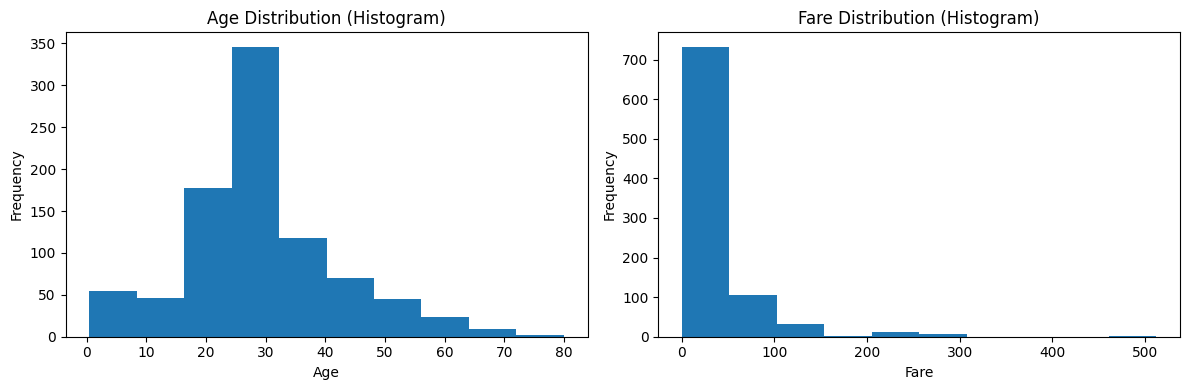

In [21]:

numerical_vars = ['Age', 'Fare']
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_vars), figsize=(12, 4))


for i, var in enumerate(numerical_vars):
    axes[i].hist(titanic_data[var])
    axes[i].set_title(f"{var} Distribution (Histogram)")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [22]:
""" According to our analysis of the distributions, there are more younger passengers when the age data 
    leans to the left. Right-skewed fare distribution indicates that more people paid cheaper fares. 
    Machine learning models, particularly those that assume normal distributions or are outlier-sensitive, 
    may be affected by these skews. For example, during training, the model may give preference to the 
    younger age or lower fare range that is more common, which could result in biased predictions and 
    higher errors for data that is not encountered within these ranges. 
    We can use normalization/standardization methods or modifications to handle this.
    """

' According to our analysis of the distributions, there are more younger passengers when the age data \n    leans to the left. Right-skewed fare distribution indicates that more people paid cheaper fares. \n    Machine learning models, particularly those that assume normal distributions or are outlier-sensitive, \n    may be affected by these skews. For example, during training, the model may give preference to the \n    younger age or lower fare range that is more common, which could result in biased predictions and \n    higher errors for data that is not encountered within these ranges. \n    We can use normalization/standardization methods or modifications to handle this.\n    '

Task 2: Distribution of Categorical Features

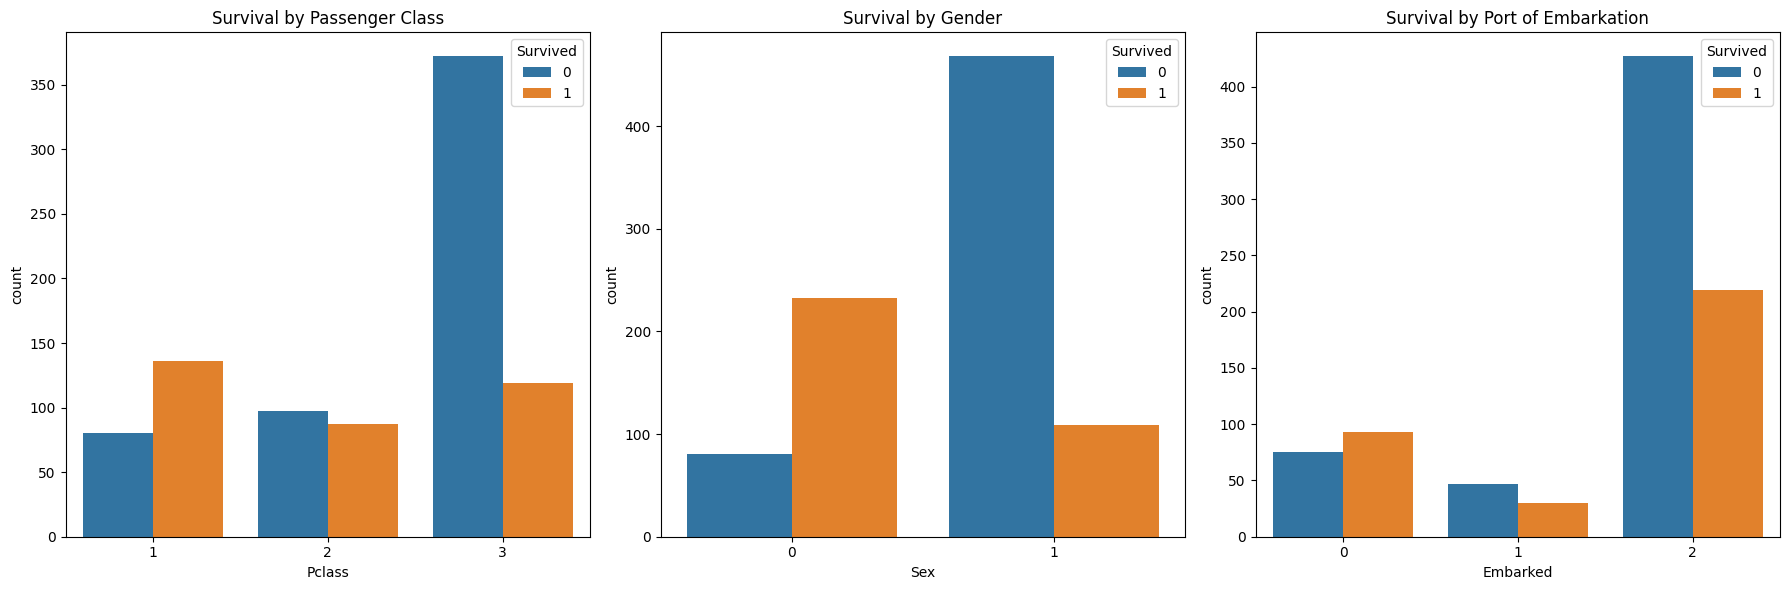

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.countplot(x='Pclass', hue='Survived', data=titanic_data, ax=axes[0])
axes[0].set_title('Survival by Passenger Class')

sns.countplot(x='Sex', hue='Survived', data=titanic_data, ax=axes[1])
axes[1].set_title('Survival by Gender')

sns.countplot(x='Embarked', hue='Survived', data=titanic_data, ax=axes[2])
axes[2].set_title('Survival by Port of Embarkation')


plt.tight_layout()
plt.show()

In [24]:
"""
Survival by Passenger Class
The chart titled "Survival by Passenger Class" shows the number of survivors according to passenger class. 
Class 1 (upper class) has the highest number of survivors, followed by Class 2 and Class 3 (lower class). 
This suggests that passenger class is correlated with survival, with higher class passengers having a better 
chance of survival.

Survival by Gender
The chart titled "Survival by Gender" shows the number of survivors by gender. There are significantly more
female survivors than male survivors. This suggests that gender is correlated with survival, with women having 
a better chance of survival than men.-Can be seen from the movie Titanic :)

Survival by Port of Embarkation
The chart titled "Survival by Port of Embarkation" shows the number of survivors according to 
the port where they embarked. The port with the most survivors is Queenstown, followed by Cherbourg and Southampton. 
It is difficult to draw any conclusions about the correlation between port of embarkation and survival from this chart.

    """

'\nSurvival by Passenger Class\nThe chart titled "Survival by Passenger Class" shows the number of survivors according to passenger class. \nClass 1 (upper class) has the highest number of survivors, followed by Class 2 and Class 3 (lower class). \nThis suggests that passenger class is correlated with survival, with higher class passengers having a better \nchance of survival.\n\nSurvival by Gender\nThe chart titled "Survival by Gender" shows the number of survivors by gender. There are significantly more\nfemale survivors than male survivors. This suggests that gender is correlated with survival, with women having \na better chance of survival than men.-Can be seen from the movie Titanic :)\n\nSurvival by Port of Embarkation\nThe chart titled "Survival by Port of Embarkation" shows the number of survivors according to \nthe port where they embarked. The port with the most survivors is Queenstown, followed by Cherbourg and Southampton. \nIt is difficult to draw any conclusions about th

Task 3: Relationship Between Features

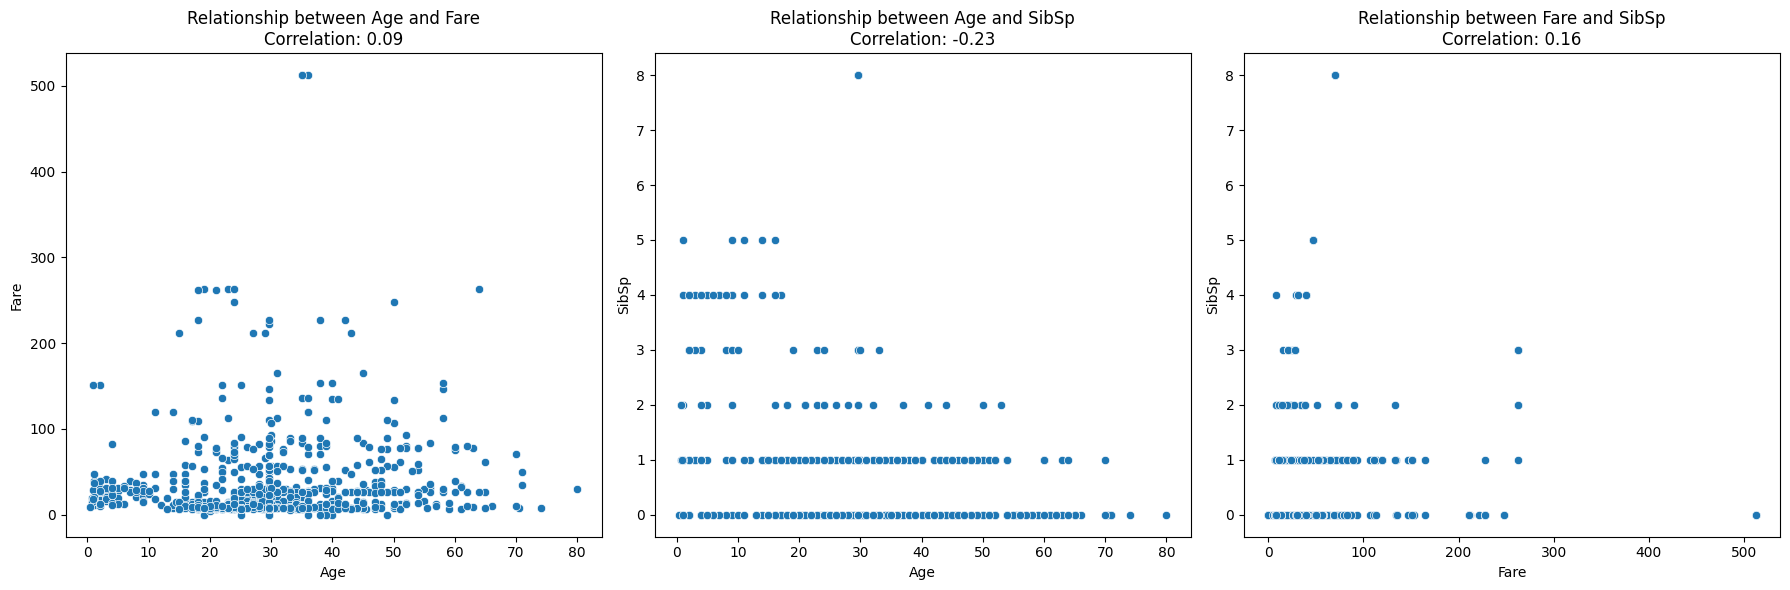

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Scatter plot for Age vs. Fare
sns.scatterplot(x='Age', y='Fare', data=titanic_data, ax=axes[0])
correlation_age_fare = titanic_data['Age'].corr(titanic_data['Fare'])
axes[0].set_title(f'Relationship between Age and Fare\nCorrelation: {correlation_age_fare:.2f}')

# Scatter plot for Age vs. SibSp
sns.scatterplot(x='Age', y='SibSp', data=titanic_data, ax=axes[1])
correlation_age_sibsp = titanic_data['Age'].corr(titanic_data['SibSp'])
axes[1].set_title(f'Relationship between Age and SibSp\nCorrelation: {correlation_age_sibsp:.2f}')

# Scatter plot for Fare vs. SibSp
sns.scatterplot(x='Fare', y='SibSp', data=titanic_data, ax=axes[2])
correlation_fare_sibsp = titanic_data['Fare'].corr(titanic_data['SibSp'])
axes[2].set_title(f'Relationship between Fare and SibSp\nCorrelation: {correlation_fare_sibsp:.2f}')

plt.tight_layout()
plt.show()


In [26]:
"""
Age and Fare: The two variables have a weakly positive link (correlation: 0.09). This implies that fare tends 
to go up a little bit with age.

Age and SibSp: The correlation between age and SibSp is -0.23, which is a minor negative relationship. 
This indicates that compared to older travelers, younger passengers were more likely to be traveling with 
spouses or siblings.

Fare and SibSp: The two variables have a weakly positive link (correlation: 0.16). This indicates that there was 
a somewhat higher likelihood of siblings or spouses traveling with passengers who paid higher rates.
    """

'\nAge and Fare: The two variables have a weakly positive link (correlation: 0.09). This implies that fare tends \nto go up a little bit with age.\n\nAge and SibSp: The correlation between age and SibSp is -0.23, which is a minor negative relationship. \nThis indicates that compared to older travelers, younger passengers were more likely to be traveling with \nspouses or siblings.\n\nFare and SibSp: The two variables have a weakly positive link (correlation: 0.16). This indicates that there was \na somewhat higher likelihood of siblings or spouses traveling with passengers who paid higher rates.\n    '

<Axes: >

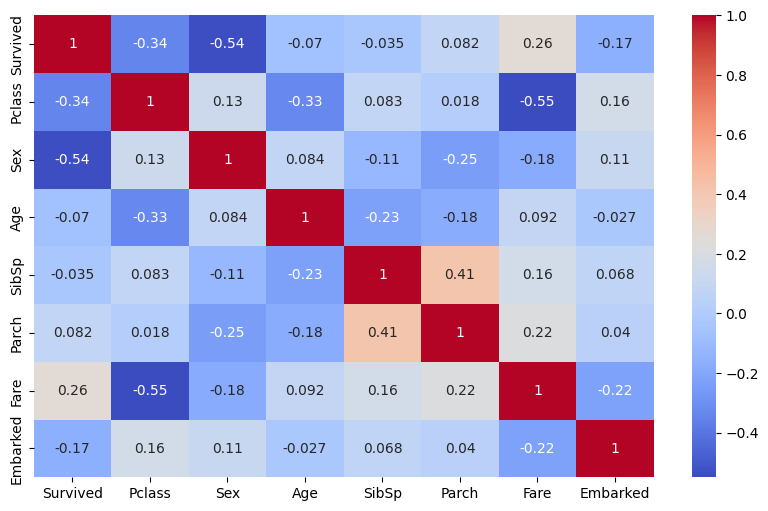

In [27]:
#I just tried this part to see all the correlations to check if I was missing any.
corr = titanic_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [28]:
"""
From the correlation heat map -which I missed- we can see that there is a moderate positive correlation (0.41) between SibSp 
(number of siblings/spouses aboard) and Parch (number of parents/children aboard). This means that passengers who traveled with 
siblings/spouses were also more likely to travel  with parents/children.
    """

'\nFrom the correlation heat map -which I missed- we can see that there is a moderate positive correlation (0.41) between SibSp \n(number of siblings/spouses aboard) and Parch (number of parents/children aboard). This means that passengers who traveled with \nsiblings/spouses were also more likely to travel  with parents/children.\n    '

### Part 4: Feature Engineering

Task 1: Creating New Features

In [29]:
# We can create a new feature for FamilySize which combines Parch and SibSp. 
# This will enable us to drop Parch and SibSp from our datasets.
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

titanic_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [30]:
# We can create another feature called IsAlone.
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

titanic_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [31]:
titanic_data = titanic_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [titanic_data, test_df]

titanic_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,1,22.0,7.2500,2,0
1,1,1,0,38.0,71.2833,0,0
2,1,3,0,26.0,7.9250,2,1
3,1,1,0,35.0,53.1000,2,0
4,0,3,1,35.0,8.0500,2,1


In [32]:
# We can also create an artificial feature combining Pclass and Age.
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

titanic_data.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,66.000000,22.000000,3
1,38.000000,38.000000,1
2,78.000000,26.000000,3
3,35.000000,35.000000,1
4,105.000000,35.000000,3
5,89.097353,29.699118,3
6,54.000000,54.000000,1
7,6.000000,2.000000,3
8,81.000000,27.000000,3
9,28.000000,14.000000,2


In [33]:
"""
The use of new features such as "FamilySize" and "IsAlone" tries to collect more information about passengers' family structures, 
which may influence survival rates. "FamilySize" adds up the number of siblings, spouses, and parents/children a passenger has, 
offering a complete picture of their family unit onboard. This feature could be useful since travelers traveling with larger families 
may have used different survival techniques or received support during the crisis. Furthermore, "IsAlone" highlights passengers who are 
traveling alone, which could highlight variations in survival rates between those who are alone and those who are with family. By merging 
similar variables to create more relevant ones, the model may be able to identify underlying patterns and dependencies in the data, thereby 
increasing prediction performance. 

The concept of "Age*Class" proposes an interaction term between age and passenger class, which can capture variations in survival patterns 
related to both age demographics and socioeconomic standing. These manufactured features improve the dataset by providing more meaningful 
representations of passenger qualities, potentially improving the model's capacity to generalize and generate correct predictions.
    """

'\nThe use of new features such as "FamilySize" and "IsAlone" tries to collect more information about passengers\' family structures, \nwhich may influence survival rates. "FamilySize" adds up the number of siblings, spouses, and parents/children a passenger has, \noffering a complete picture of their family unit onboard. This feature could be useful since travelers traveling with larger families \nmay have used different survival techniques or received support during the crisis. Furthermore, "IsAlone" highlights passengers who are \ntraveling alone, which could highlight variations in survival rates between those who are alone and those who are with family. By merging \nsimilar variables to create more relevant ones, the model may be able to identify underlying patterns and dependencies in the data, thereby \nincreasing prediction performance. \n\nThe concept of "Age*Class" proposes an interaction term between age and passenger class, which can capture variations in survival patterns 

Task 2: Binning Numerical Data


In [34]:
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], 5)
titanic_data[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=False).mean().sort_values(by='AgeGroup', ascending=True)

/var/folders/j6/8zjndvrj0cxcm398ccrt0mh40000gn/T/ipykernel_1986/1875441734.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_data[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=False).mean().sort_values(by='AgeGroup', ascending=True)


,AgeGroup,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [35]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
titanic_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class,AgeGroup
0,0,3,1,1.0,7.2500,2,0,66.0,"(16.336, 32.252]"
1,1,1,0,2.0,71.2833,0,0,38.0,"(32.252, 48.168]"
2,1,3,0,1.0,7.9250,2,1,78.0,"(16.336, 32.252]"
3,1,1,0,2.0,53.1000,2,0,35.0,"(32.252, 48.168]"
4,0,3,1,2.0,8.0500,2,1,105.0,"(32.252, 48.168]"


In [36]:
titanic_data = titanic_data.drop(['AgeGroup'], axis=1)
combine = [titanic_data, test_df]
titanic_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class
0,0,3,1,1.0,7.2500,2,0,66.0
1,1,1,0,2.0,71.2833,0,0,38.0
2,1,3,0,1.0,7.9250,2,1,78.0
3,1,1,0,2.0,53.1000,2,0,35.0
4,0,3,1,2.0,8.0500,2,1,105.0


In [37]:
"""
In data analysis, binning refers to the grouping of related data points into groups, or "bins." We do this for several reasons.  
First, it can simplify complex data by lowering the number of distinct values. This makes it easy to see trends and patterns. 
Second, binning can boost the accuracy of some statistical models. Certain algorithms work better with categorical data than with continuous 
values. Finally, binning can show outliers, which are data points that fall outside of the predicted range. This can aid us in investigating 
any errors or interesting abnormalities in the data collection.

"""

'\nIn data analysis, binning refers to the grouping of related data points into groups, or "bins." We do this for several reasons.  \nFirst, it can simplify complex data by lowering the number of distinct values. This makes it easy to see trends and patterns. \nSecond, binning can boost the accuracy of some statistical models. Certain algorithms work better with categorical data than with continuous \nvalues. Finally, binning can show outliers, which are data points that fall outside of the predicted range. This can aid us in investigating \nany errors or interesting abnormalities in the data collection.\n\n'

### Part 5: Preparing Data for Modeling

Task 1: Data Scaling

In [38]:
numerical_features = ['Pclass', 'Age', 'Fare', 'IsAlone', 'Age*Class']
scaler = StandardScaler()
titanic_data[numerical_features] = scaler.fit_transform(titanic_data[numerical_features])

print(titanic_data.head())


   Survived    Pclass  Sex       Age      Fare  Embarked   IsAlone  Age*Class
0         0  0.827377    1 -0.144738 -0.502445         2 -1.231645   0.031376
1         1 -1.566107    0 -0.013479  0.786845         0 -1.231645  -0.818937
2         1  0.827377    0 -0.144738 -0.488854         2  0.811922   0.395796
3         1 -1.566107    0 -0.013479  0.420730         2 -1.231645  -0.910042
4         0  0.827377    1 -0.013479 -0.486337         2  0.811922   1.215741


In [39]:
"""
Scaling our data matters since many algorithms use the Euclidean distance between two data points in their computations, 
which is affected by the scale of the variables. If one variable is significantly bigger than another, it will dominate the distance 
computation and have a greater impact on the algorithm. It's important to remember that not all models require scaling. Certain models,
such as decision trees or random forests, are less affected by feature scale. Standard scaling, on the other hand, is an important step
in data preprocessing for many algorithms in order to achieve optimal performance and dependable results.

"""

"\nScaling our data matters since many algorithms use the Euclidean distance between two data points in their computations, \nwhich is affected by the scale of the variables. If one variable is significantly bigger than another, it will dominate the distance \ncomputation and have a greater impact on the algorithm. It's important to remember that not all models require scaling. Certain models,\nsuch as decision trees or random forests, are less affected by feature scale. Standard scaling, on the other hand, is an important step\nin data preprocessing for many algorithms in order to achieve optimal performance and dependable results.\n\n"

Task 2: Train-Test Split

In [40]:
X_train = titanic_data.drop("Survived", axis=1)
Y_train = titanic_data["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [41]:
"""
We cannot train a machine learning model on a single dataset, and even if we do, we will be unable to judge the model's 
performance. As a result, we separated our source data into three datasets: training, testing, and maybe validation, too. 
"""

"\nWe cannot train a machine learning model on a single dataset, and even if we do, we will be unable to judge the model's \nperformance. As a result, we separated our source data into three datasets: training, testing, and maybe validation, too. \n"

In [42]:
# to see my final csv file I added this code.
clean_data_path= '/Users/idil/Desktop/edu/3rd Year/SPRING/MIS220/titanic_clean.csv'
titanic_data.to_csv(clean_data_path, index=True)